In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

In [12]:
# Preprocess data
x_train = x_train.reshape(-1, 28 * 28)  # Flatten image to 1D array
x_test = x_test.reshape(-1, 28 * 28)
x_train = x_train.astype("float32") / 255.0  # Normalize pixel values
x_test = x_test.astype("float32") / 255.0

# Conversion to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [14]:
# Neural network model
model = tf.keras.Sequential([
  keras.layers.Flatten(input_shape=(28 * 28,)),
  keras.layers.Dense(128, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [15]:
# Train the model
model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2602 - accuracy: 0.9257 - val_loss: 0.1509 - val_accuracy: 0.9556
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1141 - accuracy: 0.9661 - val_loss: 0.1107 - val_accuracy: 0.9668
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0788 - accuracy: 0.9761 - val_loss: 0.0876 - val_accuracy: 0.9733
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0587 - accuracy: 0.9824 - val_loss: 0.0772 - val_accuracy: 0.9761
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0464 - accuracy: 0.9852 - val_loss: 0.0786 - val_accuracy: 0.9765
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0343 - accuracy: 0.9894 - val_loss: 0.0762 - val_accuracy: 0.9762
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0748 - val_accuracy:

In [32]:
# Function to preprocess user input
def preprocess_user_input(input_digit):
    # Get an example of the digit from the MNIST dataset
    example_index = np.where(y_train[:, input_digit] == 1)[0][0]
    input_array = x_train[example_index]
    return input_array

# Function to predict the digit from user input
def predict_user_input(input_digit):
    processed_input = preprocess_user_input(input_digit)
    processed_input = np.expand_dims(processed_input, axis=0)  # Add batch dimension
    prediction = model.predict(processed_input)
    predicted_digit = np.argmax(prediction)
    return predicted_digit

# Function to display the image of entered number
def display_image(image_array):
    plt.imshow(image_array.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()

Enter Number : 3
1/1 [==============================] - 0s 18ms/step
Predicted digit: 3


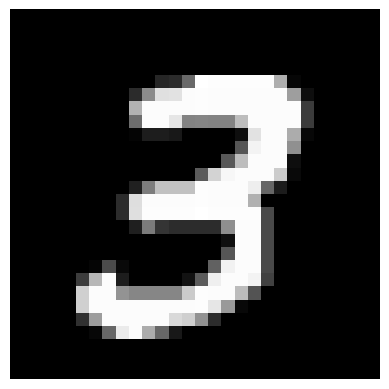

In [38]:
# Example usage with user input
user_input = int(input('Enter Number : '))
predicted_digit = predict_user_input(user_input)
print("Predicted digit:", predicted_digit)
display_image(preprocess_user_input(user_input))